In [36]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns

In [37]:
# Load the dataset from the specified Kaggle directory
file_path = '/kaggle/input/stack-overflow-annual-developer-survey-2024/survey_results_public.csv'
survey = pd.read_csv(file_path)

In [38]:
# Display the first five rows to understand the structure of the data
print("First 5 rows of the dataset:")
print(survey.head())

# Show all column names to identify available features
print("\nColumn Names:")
print(survey.columns.values)

# Provide a statistical summary of numerical columns
print("\nStatistical Summary:")
print(survey.describe())

# Display dataset details, including data types and non-null counts
print("\nDataset Info:")
survey.info()

# Check the number of unique values in each column
print("\nUnique Values in Each Column:")
print(survey.nunique())

# Check for duplicate rows in the dataset
duplicates = survey.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Identify columns with missing values
missing_values = survey.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])

First 5 rows of the dataset:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4    

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


ResponseId             65437
MainBranch                 5
Age                        8
Employment               110
RemoteWork                 3
                       ...  
JobSatPoints_11           79
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     6113
JobSat                    11
Length: 114, dtype: int64

Number of duplicate rows: 0

Columns with Missing Values:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


In [39]:
# Select relevant features for analysis 
selected_features = [
    'YearsCodePro',               # Years of professional coding experience
    'EdLevel',                    # Education level
    'Country',                    # Country of residence
    'DevType',                    # Developer roles
    'MainBranch',     # Preferred programming languages
    'Employment',                 # Employment type (full-time, part-time, etc.)
    'OrgSize',                    # Organization size
    'ConvertedCompYearly'         # Target variable (annual salary)
    
]

In [40]:
df_selected = survey[selected_features]

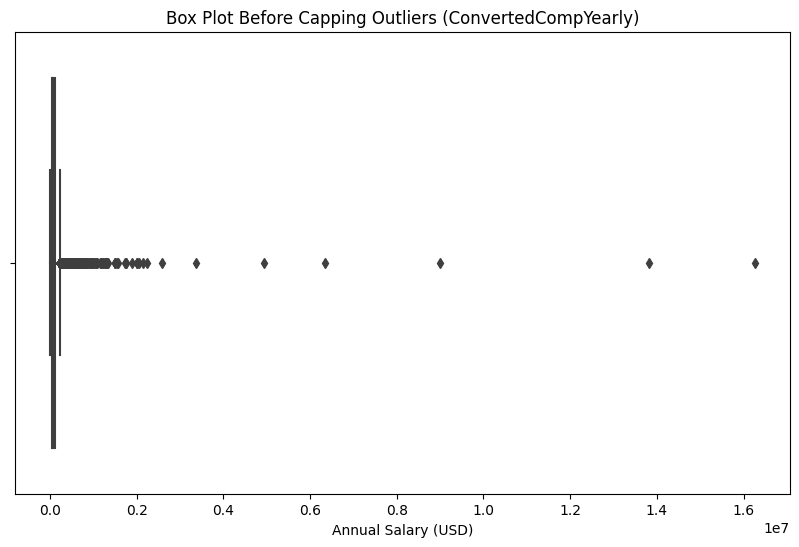

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Boxplot Before Capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_selected['ConvertedCompYearly'])
plt.title("Box Plot Before Capping Outliers (ConvertedCompYearly)")
plt.xlabel("Annual Salary (USD)")
plt.show()


In [86]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_selected['ConvertedCompYearly'].quantile(0.25)
Q3 = df_selected['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers: Any value below the lower bound will be set to the lower bound,
# and any value above the upper bound will be set to the upper bound.
df_selected['ConvertedCompYearly_capped'] = df_selected['ConvertedCompYearly'].clip(lower=lower_bound, upper=upper_bound)

# Verify that outliers are capped by checking summary statistics
print(df_selected['ConvertedCompYearly_capped'].describe())


count     23435.000000
mean      77586.768786
std       58421.337827
min           1.000000
25%       32712.000000
50%       65000.000000
75%      107971.500000
max      220860.750000
Name: ConvertedCompYearly_capped, dtype: float64


dataframe to filter outliers 

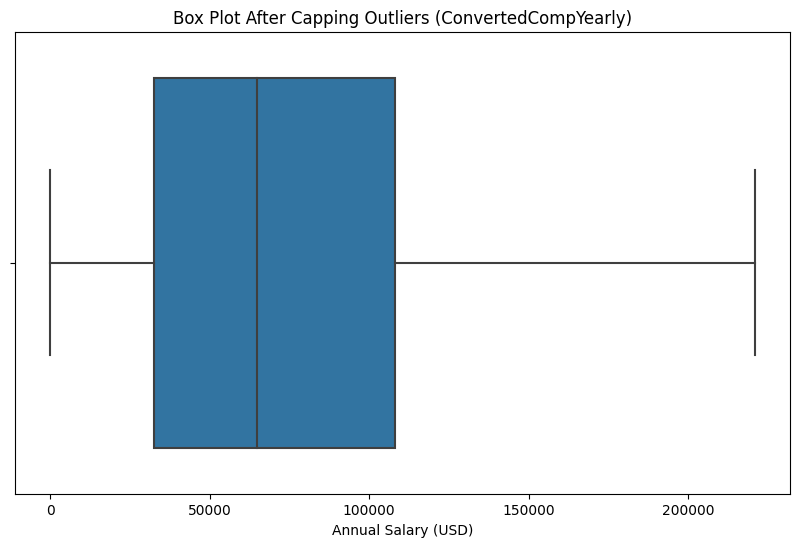

In [87]:
# Plot Boxplot After Capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_selected['ConvertedCompYearly_capped'])
plt.title("Box Plot After Capping Outliers (ConvertedCompYearly)")
plt.xlabel("Annual Salary (USD)")
plt.show()


In [42]:
df_selected

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,YearsCodePro,EdLevel,Country,DevType,MainBranch,Employment,OrgSize,ConvertedCompYearly
0,NaN,Primary/elementary school,United States of America,NaN,I am a developer by profession,"Employed, full-time",NaN,NaN
1,17,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United Kingdom of Great Britain and Northern I...,"Developer, full-stack",I am a developer by profession,"Employed, full-time",NaN,NaN
2,27,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,Developer Experience,I am a developer by profession,"Employed, full-time",NaN,NaN
3,NaN,Some college/university study without earning ...,Canada,"Developer, full-stack",I am learning to code,"Student, full-time",NaN,NaN
4,NaN,"Secondary school (e.g. American high school, G...",Norway,"Developer, full-stack",I am a developer by profession,"Student, full-time",NaN,NaN
...,...,...,...,...,...,...,...,...
65432,3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Blockchain,I am a developer by profession,"Employed, full-time",2 to 9 employees,NaN
65433,NaN,NaN,NaN,NaN,I am a developer by profession,"Employed, full-time",NaN,NaN
65434,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, mobile",I am a developer by profession,"Employed, full-time","1,000 to 4,999 employees",NaN
65435,2,"Secondary school (e.g. American high school, G...",Germany,"Developer, back-end",I am a developer by profession,"Employed, full-time",20 to 99 employees,NaN


In [43]:
#dropping rows with missing income
df_selected = df_selected.dropna(subset='ConvertedCompYearly')

In [44]:
#checking for missing values
df_selected.isnull().sum()

YearsCodePro           90
EdLevel                 0
Country                 0
DevType                32
MainBranch              0
Employment              0
OrgSize                25
ConvertedCompYearly     0
dtype: int64

In [45]:
#filling missing values for OrgSize
df_selected['OrgSize'].fillna(df_selected['OrgSize'].mode()[0], inplace=True)

<ipython-input-45-56c07aa8a221>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['OrgSize'].fillna(df_selected['OrgSize'].mode()[0], inplace=True)
<ipython-input-45-56c07aa8a221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['OrgSize'].fillna(df_selected['OrgSize'].mode()[0], inplace=True)


In [46]:
#filling missing values for devTYPE
df_selected['DevType'].fillna(df_selected['DevType'].mode()[0], inplace=True)

<ipython-input-46-5e19d5cd3e8d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['DevType'].fillna(df_selected['DevType'].mode()[0], inplace=True)
<ipython-input-46-5e19d5cd3e8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DevType'].fillna(df_selected['DevType'].mode()[0], inplace=True)


In [47]:
#filling missing values for YearsCodePro
df_selected['YearsCodePro'].fillna(df_selected['YearsCodePro'].mode()[0], inplace=True)

<ipython-input-47-9365f20879f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['YearsCodePro'].fillna(df_selected['YearsCodePro'].mode()[0], inplace=True)
<ipython-input-47-9365f20879f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['YearsCodePro'].fillna(df_selected['YearsCodePro'].mode()[0], inplace=True)


In [48]:
print(df_selected['MainBranch'].value_counts().to_string())

MainBranch
I am a developer by profession                                                           21549
I am not primarily a developer, but I write code sometimes as part of my work/studies     1886


In [49]:
df_selected.isnull().sum()

YearsCodePro           0
EdLevel                0
Country                0
DevType                0
MainBranch             0
Employment             0
OrgSize                0
ConvertedCompYearly    0
dtype: int64

In [50]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearsCodePro         23435 non-null  object 
 1   EdLevel              23435 non-null  object 
 2   Country              23435 non-null  object 
 3   DevType              23435 non-null  object 
 4   MainBranch           23435 non-null  object 
 5   Employment           23435 non-null  object 
 6   OrgSize              23435 non-null  object 
 7   ConvertedCompYearly  23435 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.6+ MB


# EDA

1. ConvertedCompYearly

In [51]:
df_selected['ConvertedCompYearly'].mean()

86155.28726264134

In [52]:
survey['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

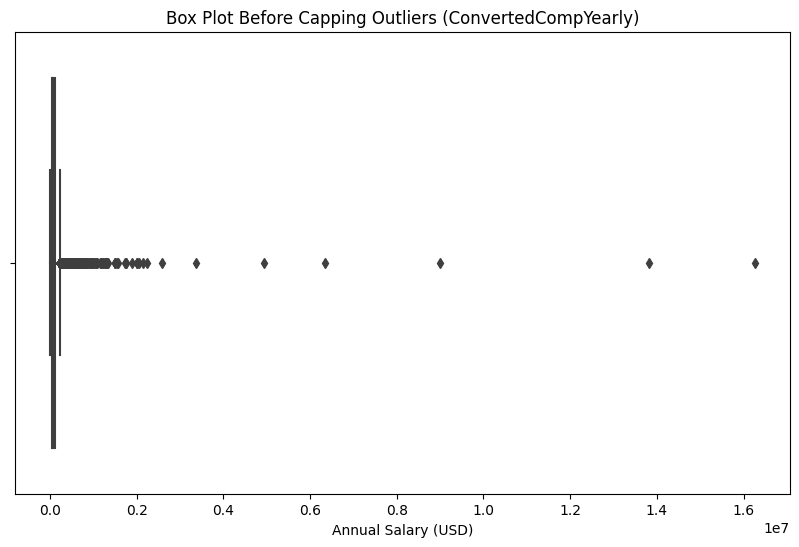

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Boxplot Before Capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_selected['ConvertedCompYearly'])
plt.title("Box Plot Before Capping Outliers (ConvertedCompYearly)")
plt.xlabel("Annual Salary (USD)")
plt.show()


In [84]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_selected['ConvertedCompYearly'].quantile(0.25)
Q3 = df_selected['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers: Any value below the lower bound will be set to the lower bound,
# and any value above the upper bound will be set to the upper bound.
df_selected['ConvertedCompYearly_capped'] = df_selected['ConvertedCompYearly'].clip(lower=lower_bound, upper=upper_bound)

# Verify that outliers are capped by checking summary statistics
print(df_selected['ConvertedCompYearly_capped'].describe())


count     23435.000000
mean      77586.768786
std       58421.337827
min           1.000000
25%       32712.000000
50%       65000.000000
75%      107971.500000
max      220860.750000
Name: ConvertedCompYearly_capped, dtype: float64


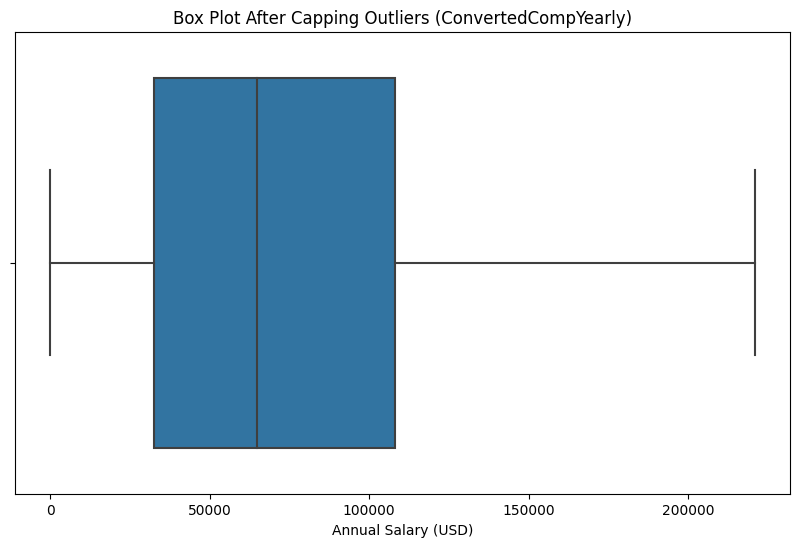

In [85]:
# Plot Boxplot After Capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_selected['ConvertedCompYearly_capped'])
plt.title("Box Plot After Capping Outliers (ConvertedCompYearly)")
plt.xlabel("Annual Salary (USD)")
plt.show()



2. Country

<Axes: title={'center': 'Country'}, ylabel='count'>

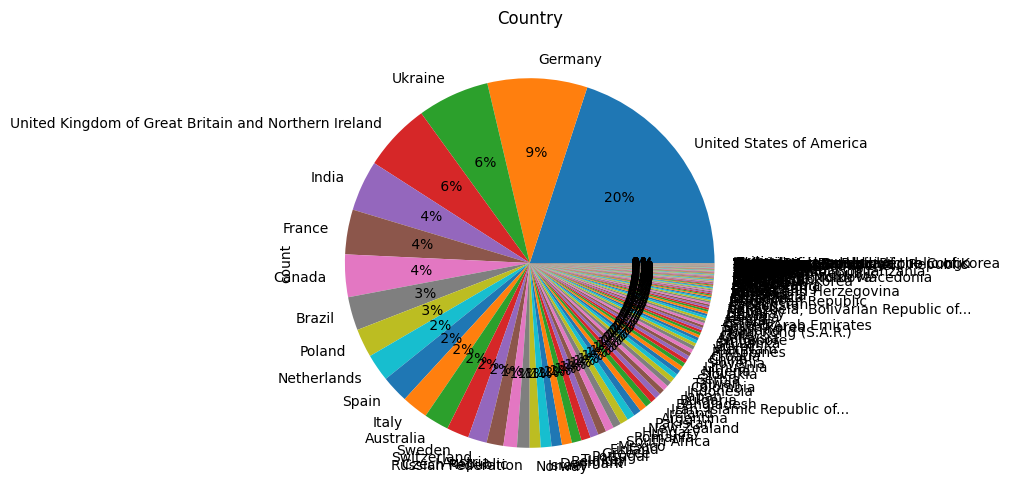

In [54]:

#list of unique values counts 
df_selected['Country'].value_counts().to_string()

#differnet graphs for visualization 
#pie chart for percentage 
plt.figure(figsize=(6, 6))
df_selected['Country'].value_counts().plot(kind = 'pie', title = 'Country', autopct='%2.0f%%')


In [55]:
def select_countries(x):
    if x =="United States of America":
        x = "USA"
    elif x == "United Kingdom of Great Britain and Northern Ireland":
        x = "UK" 
    elif x == "India":
        x = "India" 
    elif x == "Germany":
        x = "Germany" 
    else:
        x = "Others"
    return x
    
df_selected['mostCountry']  = df_selected['Country'].astype(str)
df_selected['mostCountry'] = df_selected['Country'].apply(lambda x: select_countries(x))
df_selected['mostCountry'].head()

<ipython-input-55-6cafd54e88e7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['mostCountry']  = df_selected['Country'].astype(str)
<ipython-input-55-6cafd54e88e7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['mostCountry'] = df_selected['Country'].apply(lambda x: select_countries(x))


72     Others
374    Others
379    Others
385    Others
389       USA
Name: mostCountry, dtype: object

<Axes: title={'center': 'Country'}, ylabel='count'>

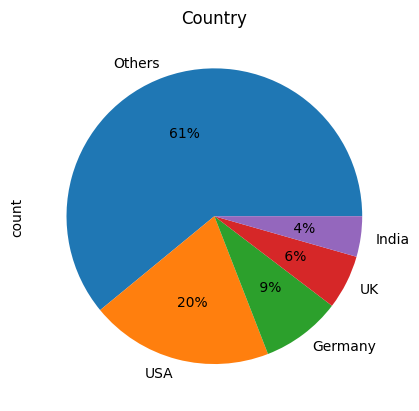

In [56]:
df_selected['mostCountry'].value_counts().plot(kind = 'pie', title = 'Country', autopct='%2.0f%%') 


Exploring the relationship between country and my target 

Average income by Country:
mostCountry
Germany     77054.550831
India       30513.611379
Others      65366.592341
UK         102603.315600
USA        161072.335685
Name: ConvertedCompYearly, dtype: float64

Descriptive statistics by Country:
               count           mean            std   min       25%       50%  \
mostCountry                                                                    
Germany       2046.0   77054.550831   56449.165030   1.0   53703.0   73036.0   
India         1037.0   30513.611379  118281.453843   1.0    7178.0   16749.0   
Others       14284.0   65366.592341  220328.689269   1.0   24000.0   50911.0   
UK            1391.0  102603.315600   86011.185980  38.0   58598.0   84076.0   
USA           4677.0  161072.335685  109920.148348   1.0  101000.0  143000.0   

                  75%         max  
mostCountry                        
Germany       91295.0   1288874.0  
India         34694.0   3367716.0  
Others        80555.0  16256603.0  
UK           1210

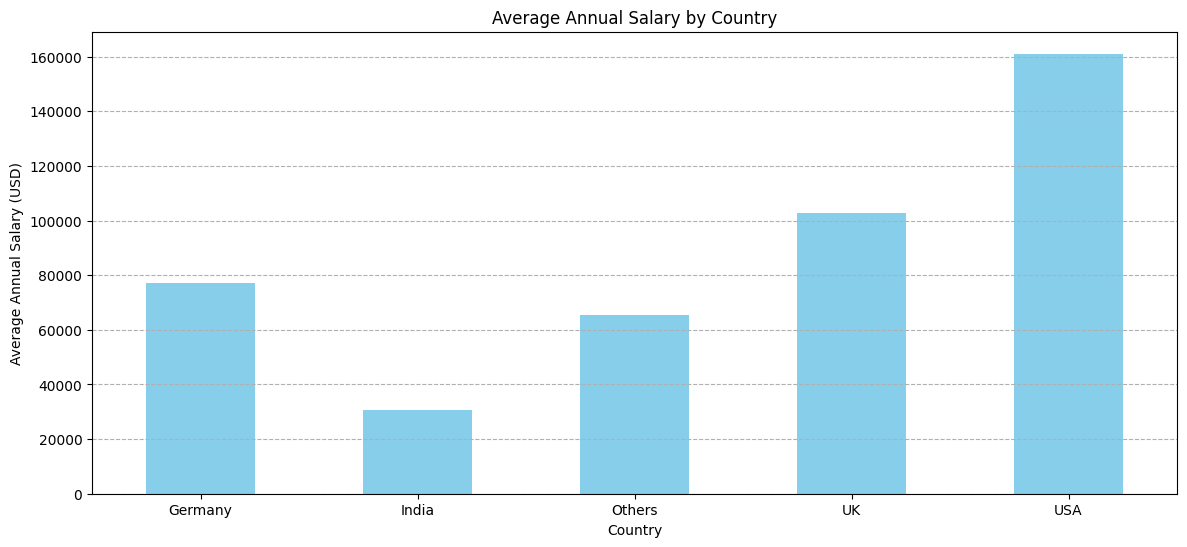

In [57]:

# Group the data by the feature (Country)
group_name = df_selected.groupby('mostCountry')

# Calculate the average income
average_income = group_name['ConvertedCompYearly'].mean()
print("Average income by Country:")
print(average_income)

# Get descriptive statistics
describe_stats = group_name['ConvertedCompYearly'].describe()
print("\nDescriptive statistics by Country:")
print(describe_stats)

# Bar chart to visualize the average income
plt.figure(figsize=(14, 6))
group_name['ConvertedCompYearly'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Annual Salary by Country')
plt.xlabel('Country')
plt.ylabel('Average Annual Salary (USD)')
plt.xticks(rotation=0) 
# Added gridlines for better visualization
plt.grid(axis='y', linestyle='--') 
plt.show()


3. Edlevel 

<Axes: xlabel='count', ylabel='EdLevel'>

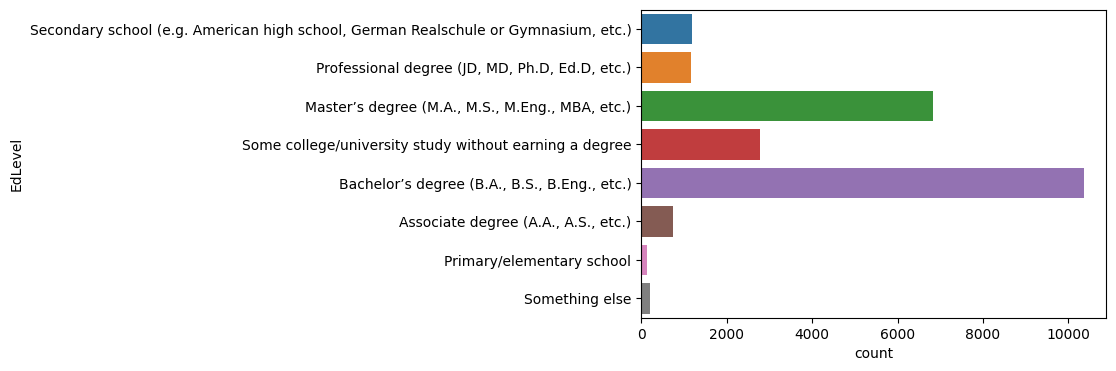

In [58]:
#list of unique values counts 
df_selected['EdLevel'].value_counts().to_string()

#count plot 
plt.figure(figsize=(6, 4))
sns.countplot(y='EdLevel', data=df_selected) 

Exploring the relationship between Edlevel and my target

<Axes: xlabel='EdLevel'>

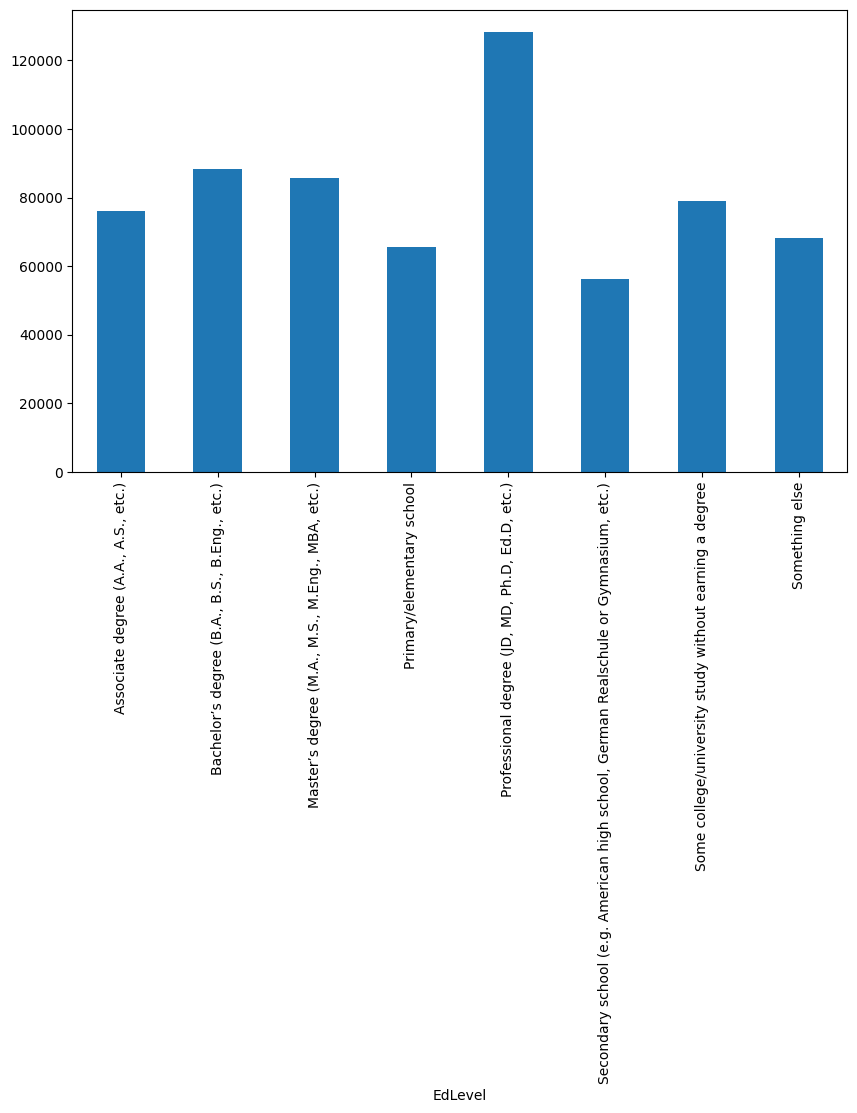

In [59]:

group_name = df_selected.groupby('EdLevel')

#look at the average income 
group_name['ConvertedCompYearly'].mean()

#describe
group_name['ConvertedCompYearly'].describe()
 

plt.figure(figsize=(10, 6))
group_name['ConvertedCompYearly'].mean().plot(kind='bar')

4. Employment

<ipython-input-60-06ee2875e4dc>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['mostEmployment']  = df_selected['Employment'].astype(str)
<ipython-input-60-06ee2875e4dc>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['mostEmployment'] =df_selected['mostEmployment'].apply(lambda x: select_employments(x))


mostEmployment
Employed, full-time                                                         17586
Others                                                                       4312
Employed, part-time                                                           432
Employed, full-time;Student, part-time                                        387
Student, full-time;Employed, part-time                                        328
Student, part-time;Employed, part-time                                        225
Independent contractor, freelancer, or self-employed;Employed, part-time      165


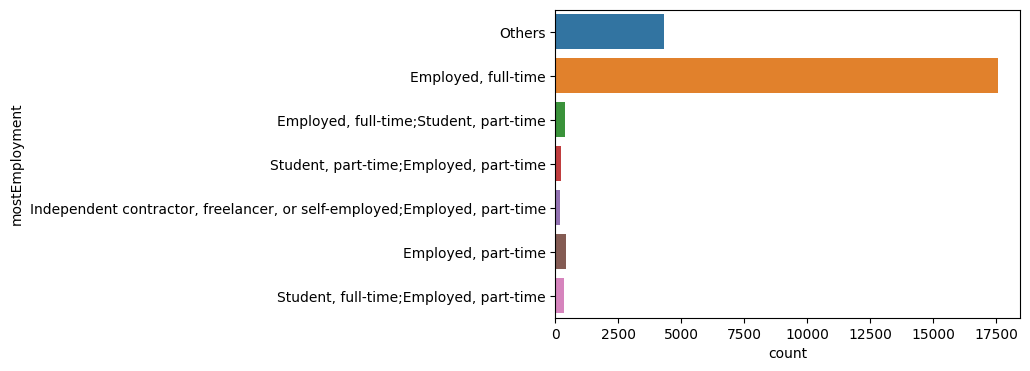

In [60]:
def select_employments(x):
    if x =="Employed, full-time":
        return x
    elif x == "Independent contractor, freelancer, or self-employed  ":
       return x
    elif x == "Student, full-time":
       return x
    elif x == "Employed, full-time;Independent contractor, freelancer, or self-employed   ":
       return x
    elif x == "Employed, part-time":
       return x
    elif x == "Student, full-time;Employed, part-time":
       return x
    elif x == "Employed, full-time;Student, full-time  ":
       return x
    elif x == "Employed, full-time;Student, part-time":
       return x
    elif x == "Student, full-time;Not employed, but looking for work":
       return x
    elif x == "Student, part-time;Employed, part-time":
      return x
    elif x == "I prefer not to say":
      return x
    elif x == "Student, part-time":
      return x
    elif x == "Independent contractor, freelancer, or self-employed;Employed, part-time":
      return x
    else:
        x = "Others"
    return x
    
df_selected['mostEmployment']  = df_selected['Employment'].astype(str)
df_selected['mostEmployment'] =df_selected['mostEmployment'].apply(lambda x: select_employments(x))
df_selected['mostEmployment'].value_counts()

#list of unique values counts 
df_selected['mostEmployment'].value_counts().to_string()

#count plot 
plt.figure(figsize=(6, 4))
sns.countplot(y='mostEmployment', data=df_selected) 

print(df_selected['mostEmployment'].value_counts().to_string())

exploring the relationship between Employment and Income(convertedcompyearly)

<Axes: xlabel='mostEmployment'>

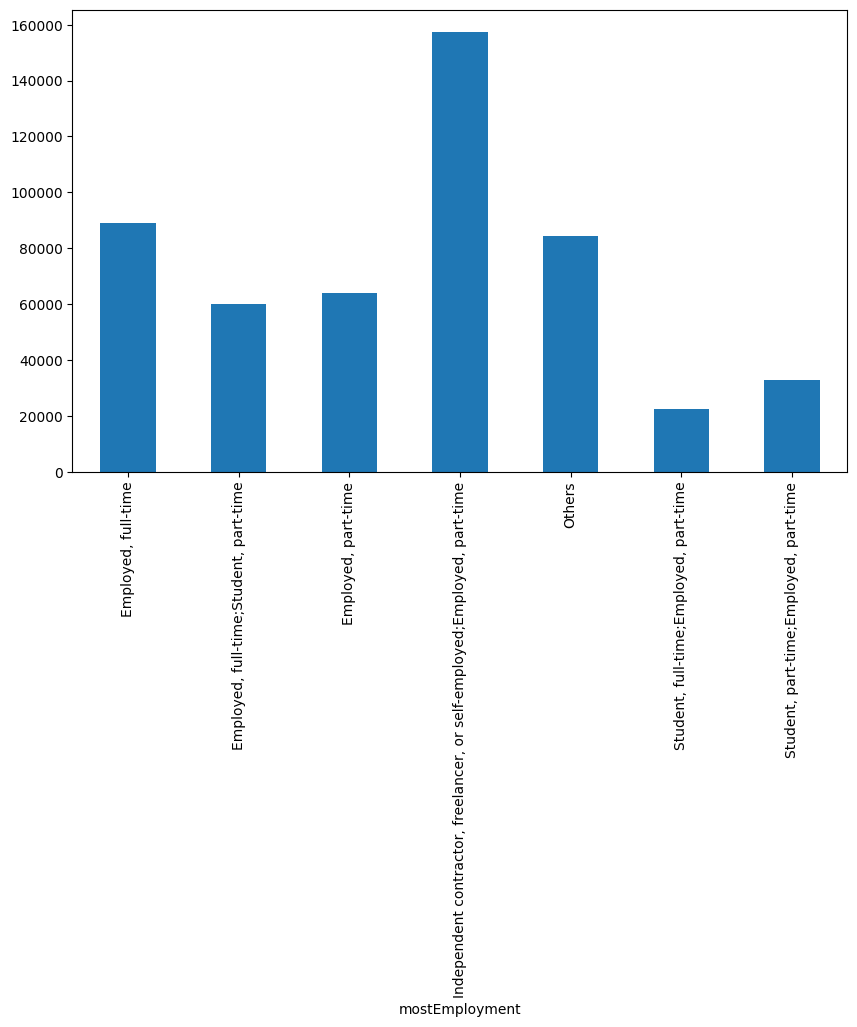

In [61]:
group_name = df_selected.groupby('mostEmployment')

#look at the average income 
group_name['ConvertedCompYearly'].mean()

#describe
group_name['ConvertedCompYearly'].describe()
 
plt.figure(figsize=(10, 6))
group_name['ConvertedCompYearly'].mean().plot(kind='bar')

5. YearsCodePro 

<ipython-input-62-31bf6c447498>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['YearsCodePro'] = pd.to_numeric(df_selected['YearsCodePro'], errors='coerce')  # Coerce invalid entries to NaN
<ipython-input-62-31bf6c447498>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['rangeGroup'] = df_selected['YearsCodePro'].apply(lambda x: group_experience(x))


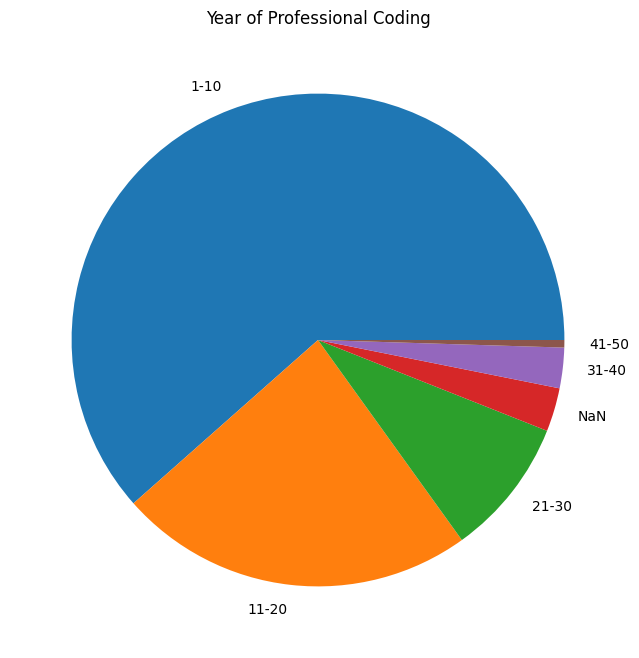

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to group experience into defined ranges
def group_experience(x):
    if x < 1:
        return "0-1"
    elif x > 50:
        return "50+"
    else:
        if 1 <= x <= 10:
            return "1-10"
        elif 11 <= x <= 20:
            return "11-20"
        elif 21 <= x <= 30:
            return "21-30"
        elif 31 <= x <= 40:
            return "31-40"
        elif 41 <= x <= 50:
            return "41-50"
        return "NaN"  # Return NaN if the value is out of expected range

# Ensure YearsCodePro is numeric
df_selected['YearsCodePro'] = pd.to_numeric(df_selected['YearsCodePro'], errors='coerce')  # Coerce invalid entries to NaN

# Apply the grouping function to the YearsCodePro column
df_selected['rangeGroup'] = df_selected['YearsCodePro'].apply(lambda x: group_experience(x))

# Create a pie chart to visualize the distribution of experience ranges
plt.figure(figsize=(8, 8))
df_selected['rangeGroup'].value_counts().plot(kind='pie', title='Year of Professional Coding')
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()


In [63]:
# Check the column names after One-Hot Encoding
print(df_selected.columns)


Index(['YearsCodePro', 'EdLevel', 'Country', 'DevType', 'MainBranch',
       'Employment', 'OrgSize', 'ConvertedCompYearly', 'mostCountry',
       'mostEmployment', 'rangeGroup'],
      dtype='object')


encoding

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Apply One-Hot Encoding to the 'rangeGroup' column
df_selected = pd.get_dummies(df_selected, columns=['rangeGroup'], drop_first=True)

# Check the result to make sure the encoding was successful
print(df_selected.columns)

# Check the first few rows to ensure the encoding worked correctly
print(df_selected.head())


Index(['YearsCodePro', 'EdLevel', 'Country', 'DevType', 'MainBranch',
       'Employment', 'OrgSize', 'ConvertedCompYearly', 'mostCountry',
       'mostEmployment', 'rangeGroup_11-20', 'rangeGroup_21-30',
       'rangeGroup_31-40', 'rangeGroup_41-50', 'rangeGroup_NaN'],
      dtype='object')
     YearsCodePro                                            EdLevel  \
72            1.0  Secondary school (e.g. American high school, G...   
374           6.0     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
379           6.0    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
385          17.0    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
389           7.0  Some college/university study without earning ...   

                      Country                                        DevType  \
72                   Pakistan  Data scientist or machine learning specialist   
374                   Austria                            Academic researcher   
379                    Turkey  Dat

exploring the relationship between yearcode pro and income

In [65]:
# Print the columns to check the names of the One-Hot Encoded columns
print(df_selected.columns)


Index(['YearsCodePro', 'EdLevel', 'Country', 'DevType', 'MainBranch',
       'Employment', 'OrgSize', 'ConvertedCompYearly', 'mostCountry',
       'mostEmployment', 'rangeGroup_11-20', 'rangeGroup_21-30',
       'rangeGroup_31-40', 'rangeGroup_41-50', 'rangeGroup_NaN'],
      dtype='object')


rangeGroup_11-20  rangeGroup_21-30  rangeGroup_31-40  rangeGroup_41-50  rangeGroup_NaN
False             False             False             False             False              70019.685229
                                                                        True               38552.612519
                                                      True              False             136828.234783
                                    True              False             False             130951.427653
                  True              False             False             False             125405.673412
True              False             False             False             False             113065.013134
Name: ConvertedCompYearly, dtype: float64


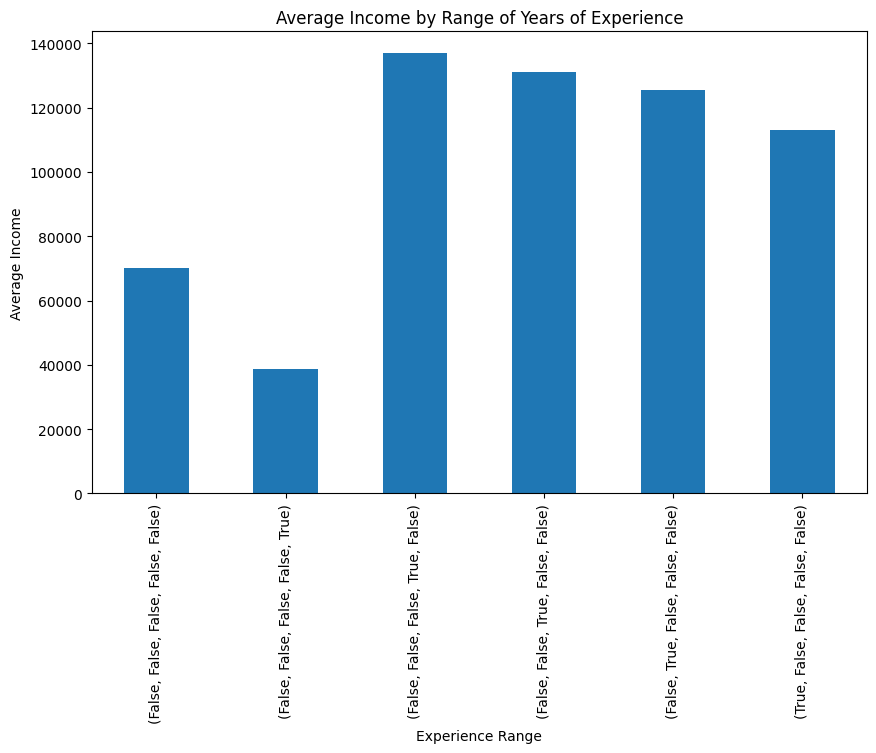

In [66]:
# Group by the available one-hot encoded columns
experience_groups = ['rangeGroup_11-20', 'rangeGroup_21-30', 'rangeGroup_31-40', 
                     'rangeGroup_41-50', 'rangeGroup_NaN']

# Calculate the average income for each experience range group
avg_income_by_group = df_selected.groupby(experience_groups)['ConvertedCompYearly'].mean()

# Display the result
print(avg_income_by_group)

# Plot the average income for each experience range group
plt.figure(figsize=(10, 6))
avg_income_by_group.plot(kind='bar', title='Average Income by Range of Years of Experience')
plt.xlabel('Experience Range')
plt.ylabel('Average Income')
plt.show()


In [67]:
# Check how many entries fall into the NaN category
print(df_selected['rangeGroup_NaN'].sum())  # This will show how many rows have 'NaN' experience range


671


6.DevType

DevType
Developer, full-stack                            8322
Developer, back-end                              4738
Developer, front-end                             1412
Developer, desktop or enterprise applications    1061
Developer, mobile                                 825
Developer, embedded applications or devices       745
Other (please specify):                           651
Data engineer                                     579
Engineering manager                               541
DevOps specialist                                 489
Data scientist or machine learning specialist     437
Research & Development role                       397
Academic researcher                               396
Senior Executive (C-Suite, VP, etc.)              307
Cloud infrastructure engineer                     286
Developer, QA or test                             243
Developer, game or graphics                       209
Data or business analyst                          202
Developer, AI       

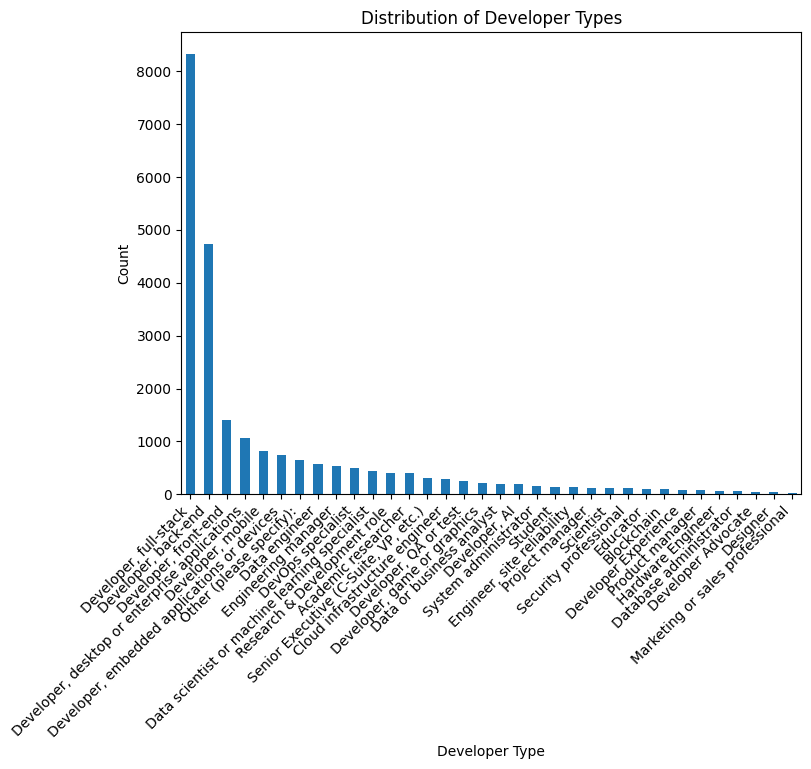

In [68]:
# Analyze 'DevType' (Developer Type)
devtype_counts = df_selected['DevType'].value_counts()
print(devtype_counts)

# Visualize the distribution of Developer Types
plt.figure(figsize=(8, 6))
devtype_counts.plot(kind='bar', title='Distribution of Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0, 50000, 100000, 150000, 200000, 300000, float('inf')]  # Salary bins
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K', '300K+']  # Labels for each bin

# Create a new column 'SalaryRange' to represent these bins
df_selected['SalaryRange'] = pd.cut(df_selected['ConvertedCompYearly'], bins=bins, labels=labels)

# Check the first few rows to confirm the SalaryRange column was added correctly
print(df_selected[['ConvertedCompYearly', 'SalaryRange']].head())


     ConvertedCompYearly SalaryRange
72                7322.0       0-50K
374              30074.0       0-50K
379              91295.0    50K-100K
385              53703.0    50K-100K
389             110000.0   100K-150K


SalaryRange                                    0-50K  50K-100K  100K-150K  \
DevType                                                                     
Academic researcher                              206       152         31   
Blockchain                                        30        23         15   
Cloud infrastructure engineer                     60        91         68   
Data engineer                                    173       218         92   
Data or business analyst                          93        70         26   
Data scientist or machine learning specialist    132       155         76   
Database administrator                            21        15         13   
Designer                                          17        17          5   
DevOps specialist                                162       179         81   
Developer Advocate                                12         4         16   
Developer Experience                              16        24         15   

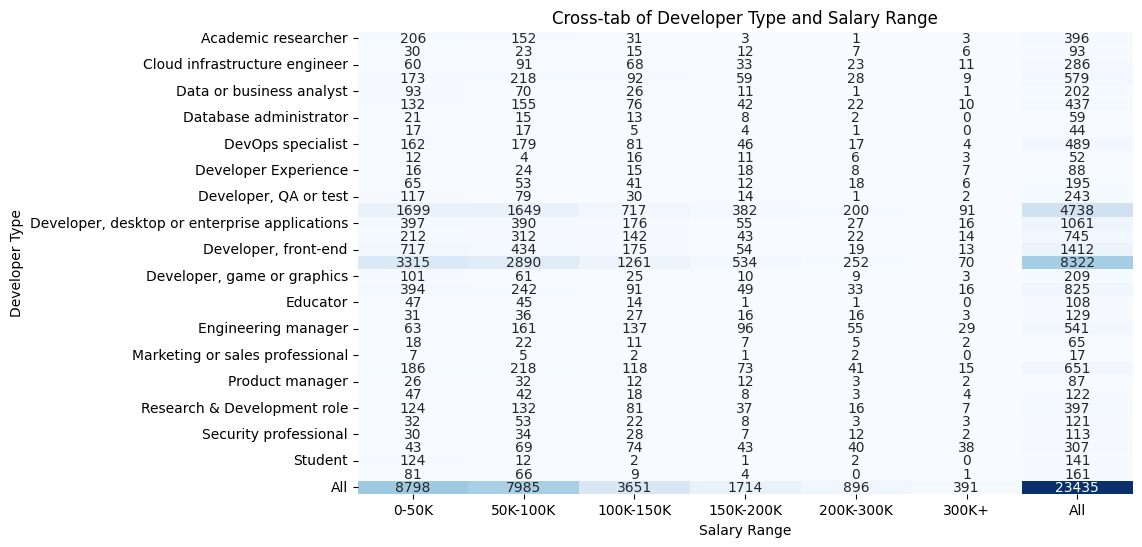

In [71]:
# Step 2: Create a cross-tabulation of 'DevType' vs 'SalaryRange'
cross_tab = pd.crosstab(df_selected['DevType'], df_selected['SalaryRange'], margins=True)

# Display the cross-tab result
print(cross_tab)

# Step 3: Plot the cross-tab as a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Cross-tab of Developer Type and Salary Range')
plt.ylabel('Developer Type')
plt.xlabel('Salary Range')
plt.show()


7.MainBranch

<Axes: xlabel='count', ylabel='MainBranch'>

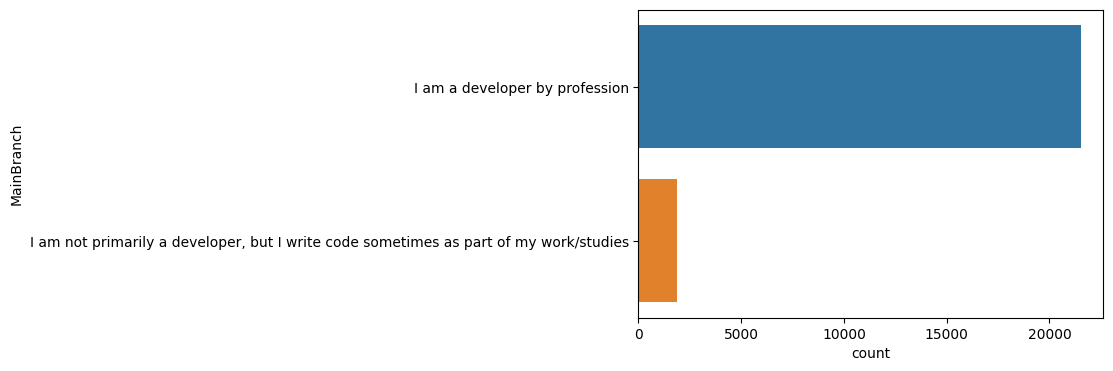

In [72]:
#list of unique values counts 
df_selected['MainBranch'].value_counts().to_string()

#count plot 
plt.figure(figsize=(6, 4))
sns.countplot(y='MainBranch', data=df_selected) 

<Axes: xlabel='MainBranch'>

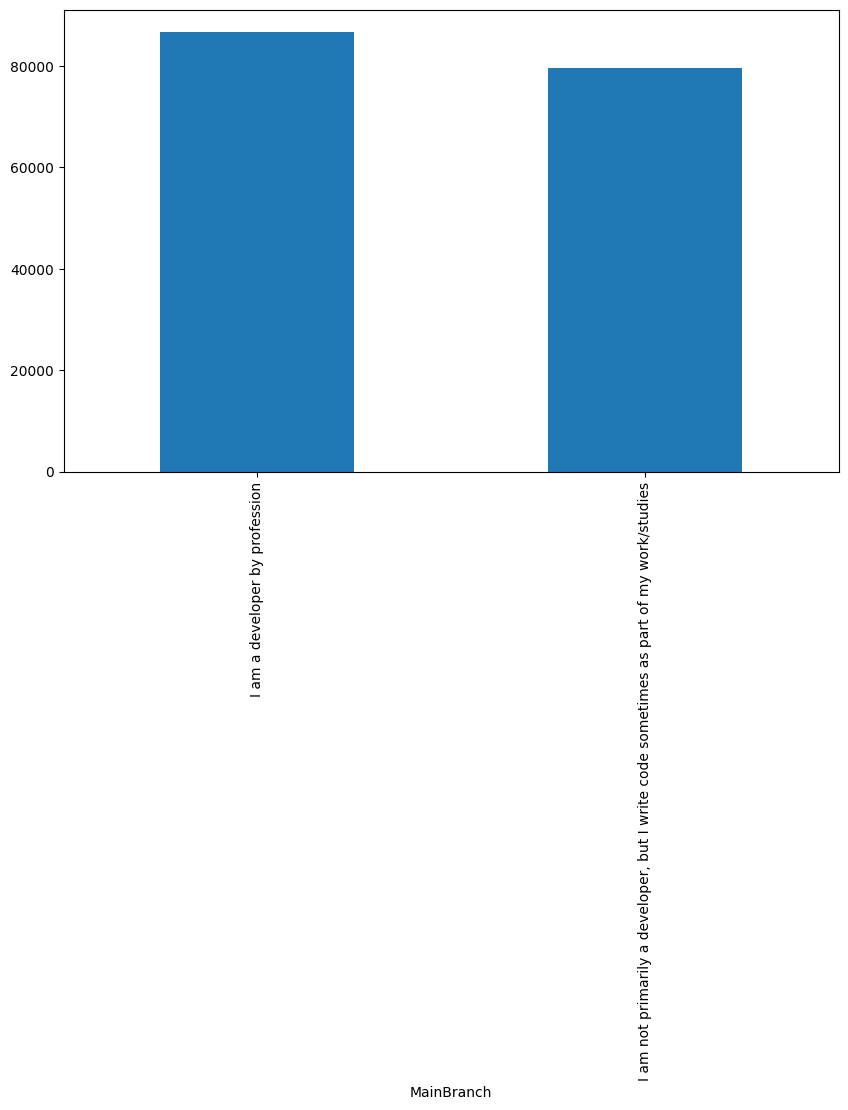

In [73]:
#to explore the relationship group you data by the feature you are working on  
group_name = df_selected.groupby('MainBranch')

#look at the average income 
group_name['ConvertedCompYearly'].mean()

#describe
group_name['ConvertedCompYearly'].describe()
 
#using a barchart
plt.figure(figsize=(10, 6))
group_name['ConvertedCompYearly'].mean().plot(kind='bar')

OrgSize

<Axes: xlabel='count', ylabel='OrgSize'>

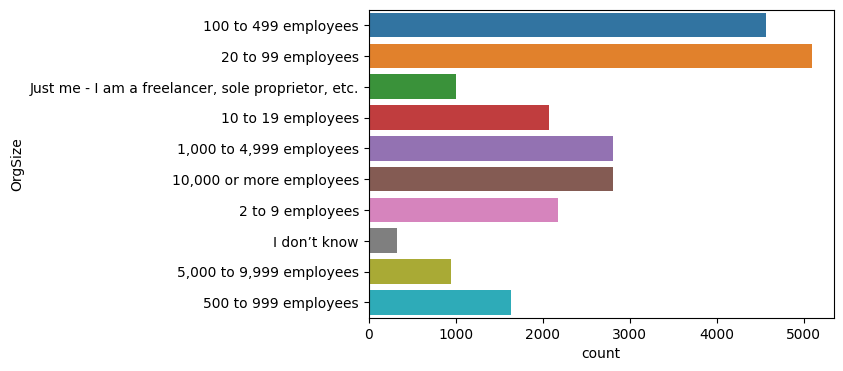

In [74]:
#list of unique values counts 
df_selected['OrgSize'].value_counts().to_string()

#count plot 
plt.figure(figsize=(6, 4))
sns.countplot(y='OrgSize', data=df_selected) 

<Axes: xlabel='OrgSize'>

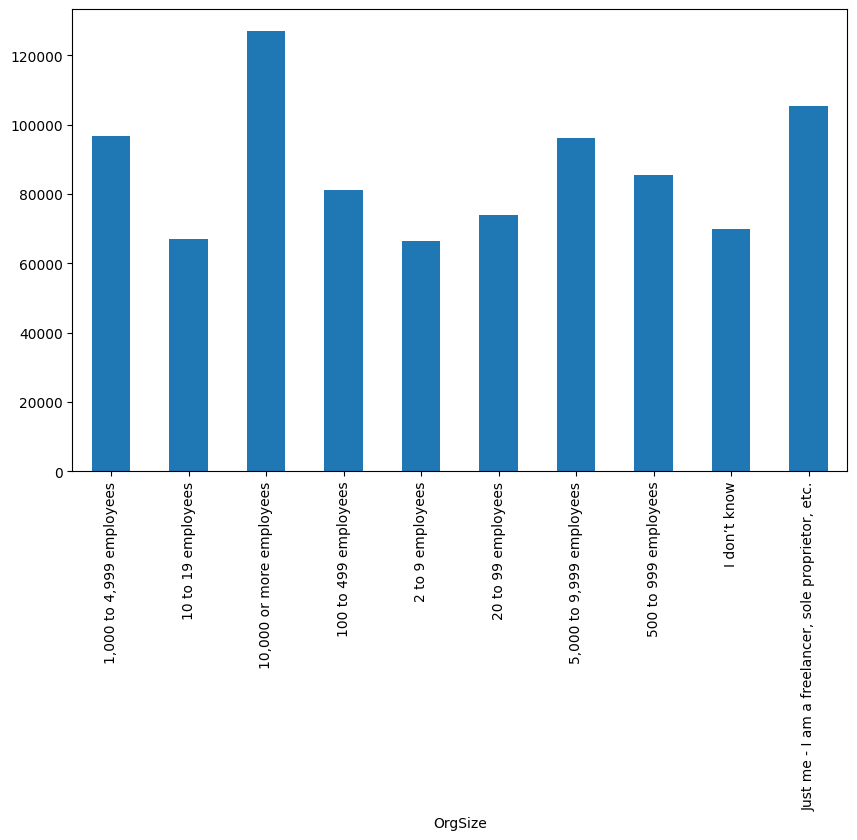

In [75]:
#to explore the relationship group you data by the feature you are working on  
group_name = df_selected.groupby('OrgSize')

#look at the average income 
group_name['ConvertedCompYearly'].mean()

#describe
group_name['ConvertedCompYearly'].describe()
 
#using a barchart
plt.figure(figsize=(10, 6))
group_name['ConvertedCompYearly'].mean().plot(kind='bar')